In [1]:
import pandas as pd
import pyarrow.parquet as pq

In [2]:
df = pd.read_parquet('../Dataset/train.parquet')

In [ ]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

X = df.drop(['is_anomaly', 'id'], axis=1)
y = df['is_anomaly']

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scale = (len(y_train) - sum(y_train)) / sum(y_train)


model = xgb.XGBClassifier(
    objective='binary:logistic',
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=scale
)
model.fit(X_train, y_train)


y_pred = model.predict(X_val)
y_proba = model.predict_proba(X_val)[:, 1]


print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))

print("\nClassification Report:")
print(classification_report(y_val, y_pred, digits=3))

print("ROC AUC Score:", roc_auc_score(y_val, y_proba))

c:\Users\ggion\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [16:25:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Confusion Matrix:
[[2618436   18408]
 [   2550  306271]]

Classification Report:
              precision    recall  f1-score   support

           0      0.999     0.993     0.996   2636844
           1      0.943     0.992     0.967    308821

    accuracy                          0.993   2945665
   macro avg      0.971     0.992     0.981   2945665
weighted avg      0.993     0.993     0.993   2945665

ROC AUC Score: 0.9995415334106545


In [5]:
print(len(X_train))
print(len(X_val))
print(len(y_train))
print(len(y_val))

11782656
2945665
11782656
2945665


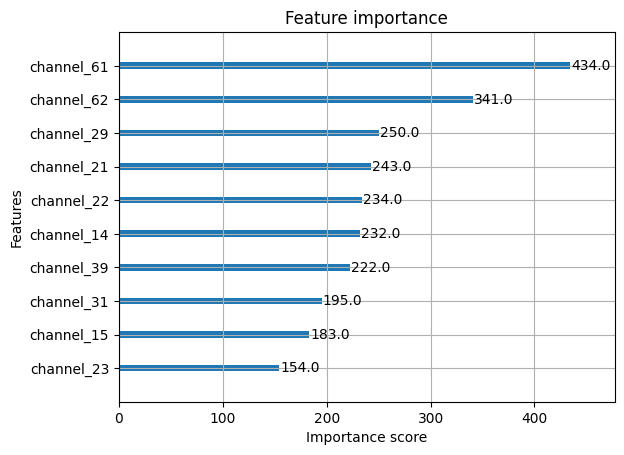

In [12]:
import matplotlib.pyplot as plt
xgb.plot_importance(model, max_num_features=10)
plt.show()

In [14]:
correlations = df.corr(numeric_only=True)['is_anomaly'].sort_values(ascending=False)
print(correlations.head(10))

is_anomaly    1.000000
channel_47    0.088230
channel_48    0.088221
channel_49    0.088215
channel_3     0.085011
channel_2     0.084728
channel_1     0.073403
channel_21    0.066923
channel_28    0.064934
channel_14    0.061508
Name: is_anomaly, dtype: float64


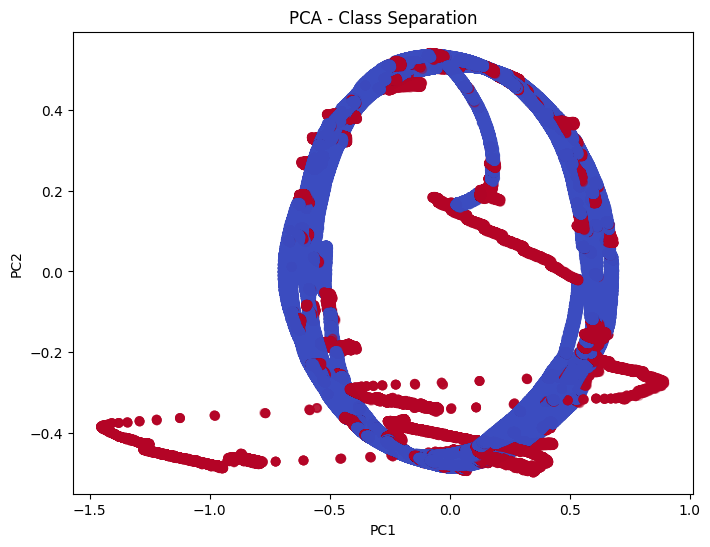

In [15]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_proj = pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_proj[:,0], X_proj[:,1], c=y, cmap='coolwarm', alpha=0.3)
plt.title("PCA - Class Separation")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()